# **Heart Disease Prediction**
By Darshik A S

### **Introduction**
Heart diseases or Cardiovasular diseases are the number one cause of death globally and it is really necessary to prevent these disease. This notebook explores the Cleveland's heart disease dataset fom UCI repository and analyse the factors causing heart problems. This notebook also includes training of models for the classifying heart disease.

### **Data Overview**

* **age**: The person’s age in years
* **sex**: The person’s sex (1 = male, 0 = female)
* **cp**: chest pain type
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: typical angina
  - Value 4: asymptomatic
* **trestbps**: The person’s resting blood pressure (mm Hg on admission to the hospital)
* **chol**: The person’s serum cholesterol measurement in mg/dl
* **fbs**: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **restecg**: resting electrocardiographic results
  - Value 1: normal
  - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 3: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* **thalach**: The person’s maximum heart rate achieved
* **exang**: Exercise induced angina (1 = yes; 0 = no)
* **oldpeak**: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
* **slope**: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
* **ca**: The number of major vessels (0–3)
* **thal**: A blood disorder called thalassemia 
  - Value 3: normal
  - Value 6: fixed defect
  - Value 7:reversable defect
*  **num**: Heart disease (1 = no, 0= yes)

**Target Variable: num**

In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data into DataFrame
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df_hd = pd.read_csv('processed_cleveland_data.csv',names=col_names,header=None)

In [4]:
# Display top 3 samples
df_hd.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [5]:
# Display bottom 3 samples
df_hd.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
# Check the type of features and check for null values
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


* No null values

In [7]:
# Check for duplicates
df_hd.duplicated().sum()

0

In [8]:
# Value counts of nominal variables
for i in df_hd.select_dtypes(include='object').columns:
  print(i)
  print(df_hd[i].nunique())
  print(df_hd[i].unique())
  print(df_hd[i].value_counts(),end='\n\n')

ca
5
['0.0' '3.0' '2.0' '1.0' '?']
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

thal
4
['6.0' '3.0' '7.0' '?']
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64



In [9]:
# Removing the missing values with mode
df_hd.loc[:,'ca'].replace({'?':pd.Series.mode(df_hd.ca)[0]},inplace=True)
df_hd.loc[:,'thal'].replace({'?':pd.Series.mode(df_hd.thal)[0]},inplace=True)

In [10]:
# Change the type of ca and thal to float values
df_hd = df_hd.astype({'ca':'float32','thal':'float32'})

In [11]:
# Replace the labels as 'No heart disease' and 'Has heart disease'
df_hd.loc[:,'num'].replace({
    0:'No Heart Disease',
    1:'Has Heart Disease',
    2:'Has Heart Disease',
    3:'Has Heart Disease',
    4:'Has Heart Disease',
},inplace=True)

In [13]:
# Check the description 
df_hd.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Explore the dataset

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context('notebook')

Skewness of Average price :  -0.20906046882012877


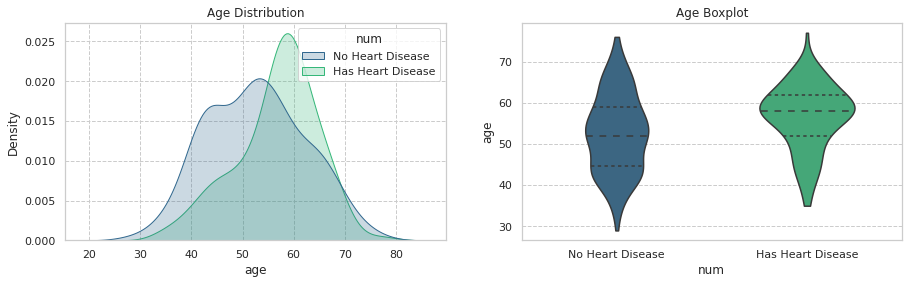

In [15]:
# Plot distribution of age attribute

print("Skewness of Average price : ",df_hd['age'].skew()) # Skewness of the age attribute

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=df_hd,x='age',hue='num',palette='viridis',fill=True,)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df_hd,y='age',x='num',width=0.5,palette='viridis',cut=0,inner="quartile")
plt.title('Age Boxplot')

plt.show()

* From the above plots, we see that most of heart patients are of the age 50-65

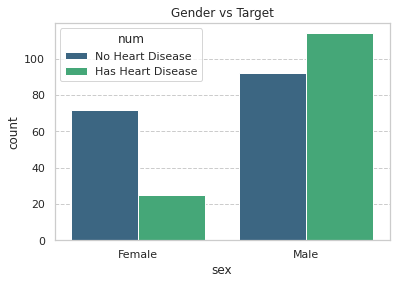

In [23]:
sns.countplot(data=df_hd,x='sex',hue='num',palette='viridis')
plt.title('Gender vs Target')
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.show()

* Men experience heart attacks more than women.
* More than 50% of the men experience heart attacks

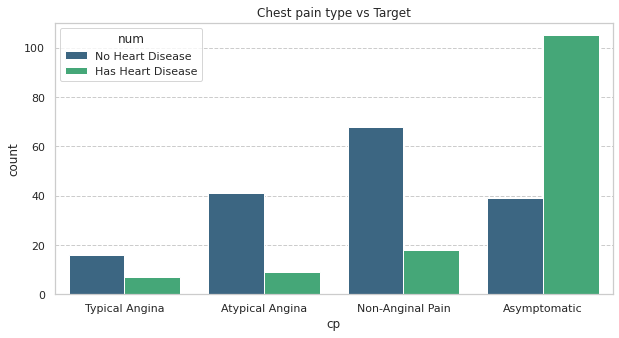

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_hd,x='cp',hue='num',palette='viridis')
plt.title('Gender vs Target')
plt.xticks(ticks=[0,1,2,3],labels=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.title('Chest pain type vs Target')
plt.show()

* Out of the four types of chest pain. Most of the patients with heart disease is found to have asymptomatic chest pain.

Skewness of Average price :  0.7060346498131783


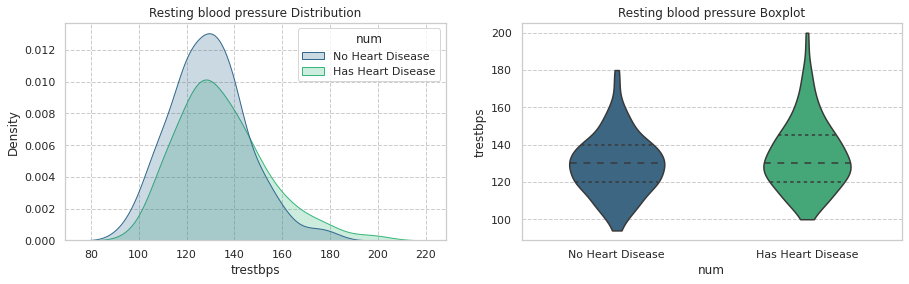

In [37]:
# Plot distribution of age attribute

print("Skewness of Average price : ",df_hd['trestbps'].skew()) # Skewness of the age attribute

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=df_hd,x='trestbps',hue='num',palette='viridis',fill=True,)
plt.title('Resting blood pressure Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df_hd,y='trestbps',x='num',width=0.5,palette='viridis',cut=0,inner="quartile")
plt.title('Resting blood pressure Boxplot')

plt.show()

* People having rest blood pressure mmore than 150 are more likely to have heart disease
* From the data we see that, all the people having blood pressure more than 180 has heart disease.

Skewness of Average price :  1.1355031533363453


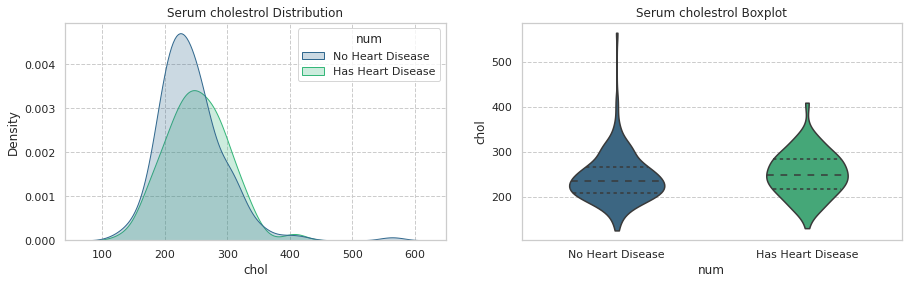

In [38]:
# Plot distribution of age attribute

print("Skewness of Average price : ",df_hd['chol'].skew()) # Skewness of the age attribute

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=df_hd,x='chol',hue='num',palette='viridis',fill=True)
plt.title('Serum cholestrol Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df_hd,y='chol',x='num',width=0.5,palette='viridis',cut=0,inner="quartile")
plt.title('Serum cholestrol Boxplot')

plt.show()

* Serum cholestrol greater than 220 mg/dl is considered higher. Yet there are many people who are not affected by heart disease.
* According to the data, people having heart disease had cholestrol level in the range 100-420 mg/dl

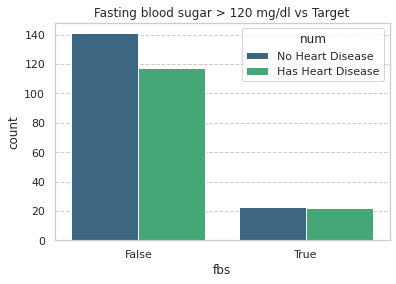

In [39]:
sns.countplot(data=df_hd,x='fbs',hue='num',palette='viridis')
plt.title('Fasting blood sugar > 120 mg/dl vs Target')
plt.xticks(ticks=[0,1],labels=['False','True'])
plt.show()

* Almost 50% of poeple with diabetes has heart disease
* There are many with normal blood sugar, but still has heart disease

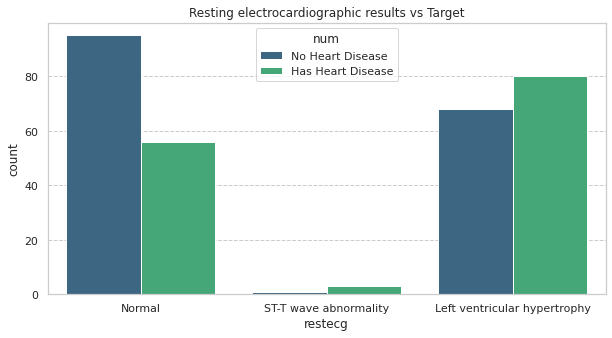

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_hd,x='restecg',hue='num',palette='viridis')
plt.xticks(ticks=[0,1,2],labels=['Normal','ST-T wave abnormality','Left ventricular hypertrophy'])
plt.title('Resting electrocardiographic results vs Target')
plt.show()

* People having normal electrocardiogram results are least likely to get heart disease
* Whereas people with ST.T wave abnormality and left ventricular hypertrophy increases the chances of getting heart attack

Skewness of maximum heart rate achieved :  -0.5374486699106463


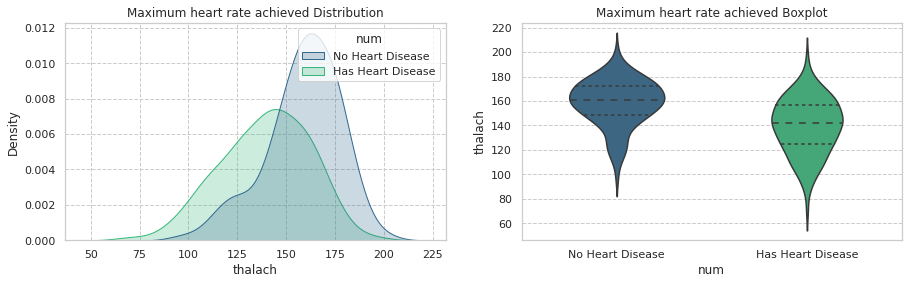

In [40]:
# Plot distribution of age attribute

print("Skewness of maximum heart rate achieved : ",df_hd['thalach'].skew()) # Skewness of the age attribute

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=df_hd,x='thalach',hue='num',palette='viridis',fill=True)
plt.title('Maximum heart rate achieved Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df_hd,y='thalach',x='num',width=0.5,palette='viridis',inner='quartile')
plt.title('Maximum heart rate achieved Boxplot')

plt.show()

* Most of the people having heart attacks had heart rate less than 140

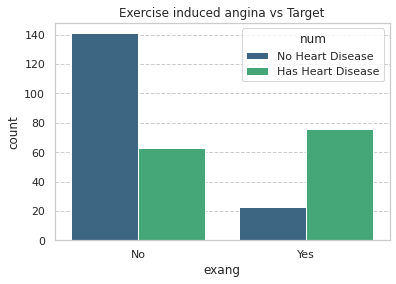

In [22]:
sns.countplot(data=df_hd,x='exang',hue='num',palette='viridis')
plt.title('Exercise induced angina vs Target')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

* In Exang, yes defines stable angina, which causes the of blood circulation to slow down.
* From the graph its clear that people having stable angina are likely to get heart disease

Skewness of ST depression induced by exercise relative to rest :  1.2697199306019966


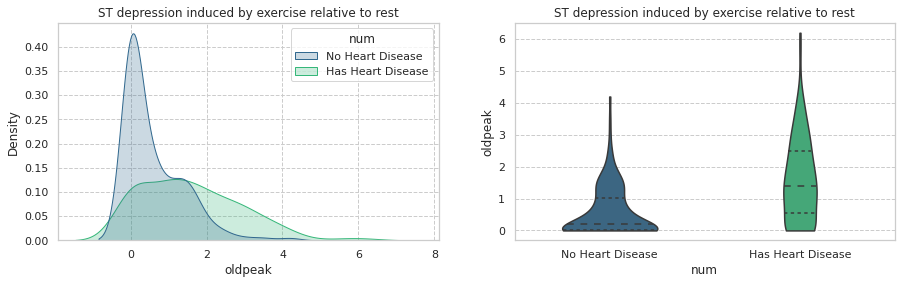

In [16]:
# Plot distribution of age attribute

print("Skewness of ST depression induced by exercise relative to rest : ",df_hd['oldpeak'].skew()) # Skewness of the age attribute

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=df_hd,x='oldpeak',hue='num',palette='viridis',fill=True)
plt.title('ST depression induced by exercise relative to rest')

plt.subplot(1,2,2)
sns.violinplot(data=df_hd,y='oldpeak',x='num',width=0.5,palette='viridis',cut=0,inner='quartile')
plt.title('ST depression induced by exercise relative to rest')

plt.show()

* Oldpeak greater than 1 are more susceptible to heart diseases

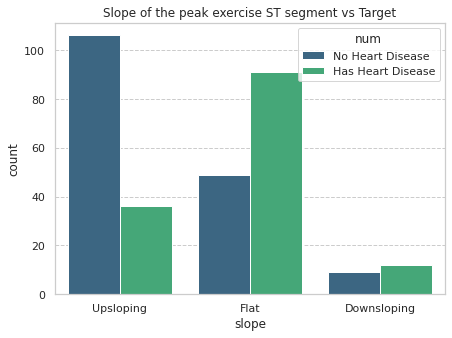

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_hd,x='slope',hue='num',palette='viridis')
plt.xticks(ticks=[0,1,2],labels=['Upsloping','Flat','Downsloping'])
plt.title('Slope of the peak exercise ST segment vs Target')
plt.show()

* Flat slope implies a higher chance of getting heart disease

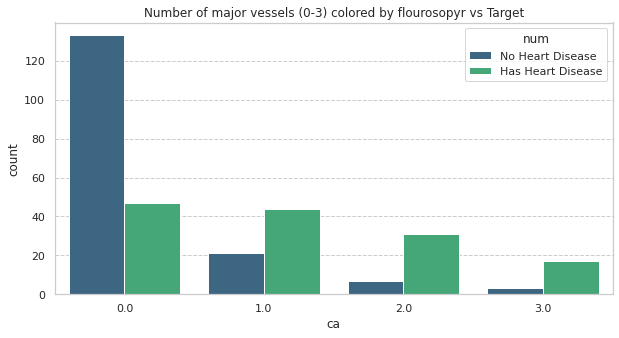

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_hd,x='ca',hue='num',palette='viridis')
plt.title('Number of major vessels (0-3) colored by flourosopyr vs Target')
plt.show()

* As the number of vessels colored by florosopyr increase the chances of heart diseases increases

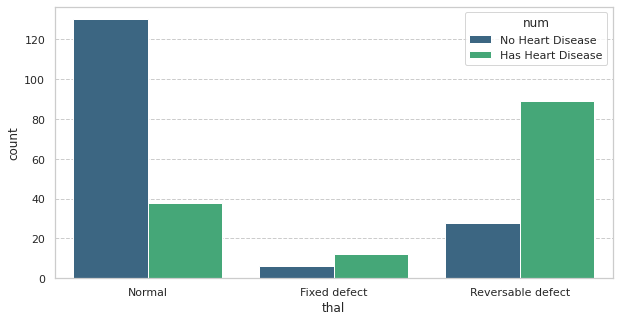

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_hd,x='thal',hue='num',palette='viridis')
plt.xticks(ticks=[0,1,2],labels=['Normal','Fixed defect','Reversable defect'])
plt.title('Thalassemia blood disoder vs Target')
plt.show()

In [147]:
# ! pip install dython
from dython.nominal import associations

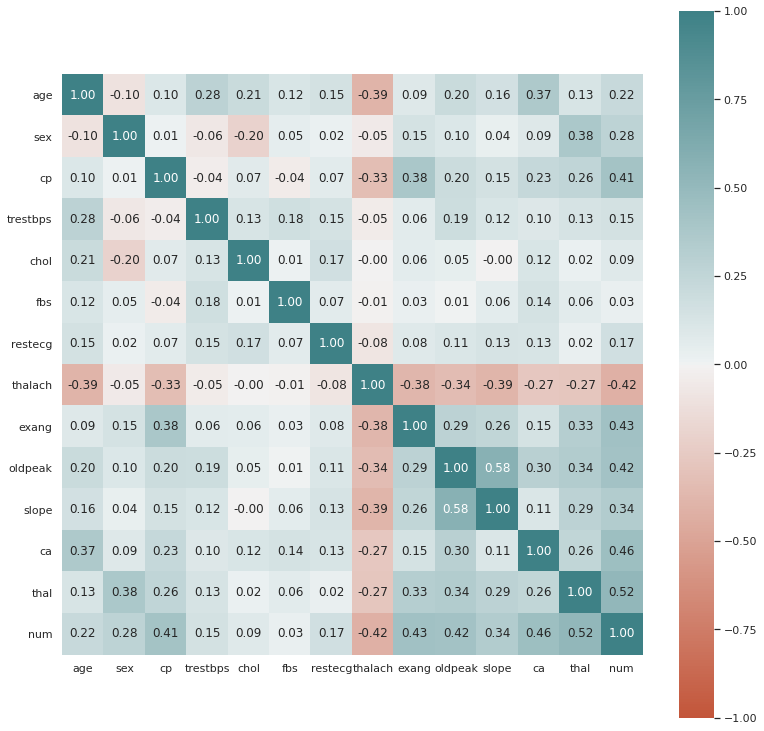

In [148]:
# Plot heatmap of the correlation 
cmap = sns.diverging_palette(20, 200, as_cmap=True)
associations(df_hd,figsize=(13, 13), cmap=cmap,annot=True)
plt.show()

* Correlation between the predictors and target variable are very low except for the thal feature there is moderate correlaion
* There is a moderate correlation between slope and oldpeak, and 

### **Feature engineering**

In [18]:
df_hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [20]:
x = df_hd.iloc[:,:-1]
y = df_hd.iloc[:,-1]

In [21]:
x.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.256375
dtype: float64

In [25]:
nominal_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [28]:
# Apply one hot encoding on the nominal variables
enc = []
for i in nominal_cols[1:]:
    enc.append(pd.get_dummies(x[i],prefix=i,drop_first=True))

nominal_ecoded = pd.concat(enc,axis=1)
nominal_ecoded.shape

(303, 14)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Scale down data using Minman scaler
scaled = MinMaxScaler().fit_transform(x.drop(columns=nominal_cols))
x_scaled = pd.DataFrame(scaled,columns=x.drop(columns=nominal_cols).columns)
x_scaled.shape

(303, 5)

In [41]:
x_clf = pd.concat([nominal_ecoded,x_scaled],axis=1)
x_clf.shape

(303, 19)

In [42]:
y.unique()

array(['No Heart Disease', 'Has Heart Disease'], dtype=object)

In [44]:
# Label encode target variable
y.replace({'No Heart Disease':0, 'Has Heart Disease':1},inplace=True)

In [45]:
from sklearn.decomposition import PCA
import numpy as np

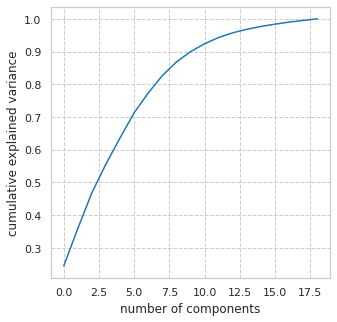

In [47]:
# Dimentionality reduction using PCA
pca = PCA().fit(x_clf)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* It requires minimum of 18 component to retain 100% variance

In [48]:
pca = PCA(n_components=18).fit_transform(x_clf)
pca.shape

(303, 18)

### **Model Training and Evaluation**

In [118]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score,cross_validate
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [104]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score,recall_score,roc_curve, roc_auc_score, classification_report

In [105]:
# Find out random state for best possible arrangement of train and test data
random_state = []
for i in range(1,101):
  x_train, x_test, y_train, y_test = train_test_split(pca,y,test_size=0.25,random_state=i)
  model = LogisticRegression().fit(x_train,y_train)
  random_state.append(model.score(x_test,y_test))
print('Best random state : ',random_state.index(max(random_state))+1)

Best random state :  84


In [106]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(pca,y,test_size=0.25,random_state=84)

In [119]:
# Load linear, tree and ensemble model
models_dict = {
    'LGC': LogisticRegression(),
    'RDC': RidgeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(probability=True),
    'KNC': KNeighborsClassifier(),
    'DTC': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(),
    'ABC': AdaBoostClassifier(),
    'ETC': ExtraTreesClassifier(),
}

In [120]:
# Apply cross validation on each models
cv_score = {}
for model in models_dict:
  print('-----',model,'-----')
  cls = models_dict[model]
  kfold = StratifiedKFold(n_splits=9,random_state=84)
  cv_results = cross_validate(cls, x_train, y_train, scoring='accuracy', cv=kfold)
  cv_score[model] = cv_results['test_score']
  print('R2 Score : ',round(cv_results['test_score'].mean(),3),' +/-',round(cv_results['test_score'].std()*2,3))

----- LGC -----
R2 Score :  0.771  +/- 0.168
----- RDC -----
R2 Score :  0.789  +/- 0.185
----- LDA -----
R2 Score :  0.793  +/- 0.154
----- SVM -----
R2 Score :  0.819  +/- 0.125
----- KNC -----
R2 Score :  0.793  +/- 0.103
----- DTC -----
R2 Score :  0.697  +/- 0.178
----- RFC -----
R2 Score :  0.793  +/- 0.178
----- ABC -----
R2 Score :  0.731  +/- 0.189
----- ETC -----
R2 Score :  0.789  +/- 0.161


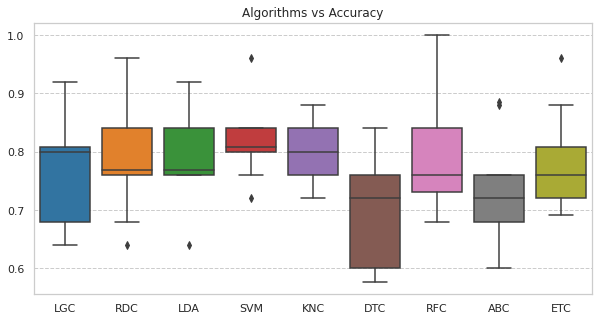

In [121]:
# Plot the accuracies of the classfiers
df = pd.DataFrame(cv_score)
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title('Algorithms vs Accuracy')
plt.show()

In [110]:
# LGC classifier
params = {
    'penalty':['l2'],
    'C':[1.0, 1.5, 0.1, 0.5, 0.01],
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    }

kfold = StratifiedKFold(n_splits=9, random_state=84)
lgc_grid = GridSearchCV(LogisticRegression(), param_grid=params, scoring='accuracy', cv=kfold)
lgc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (lgc_grid.best_score_, lgc_grid.best_params_))

Best: 0.797265 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [111]:
# LDA classifier
params = {
    'solver':['svd', 'lsqr', 'eigen'],
    'shrinkage':np.arange(0, 1, 0.01)
    }

kfold = KFold(n_splits=9,random_state=84)
ldc_grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy', cv=kfold)
ldc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (ldc_grid.best_score_, ldc_grid.best_params_))

Best: 0.806154 using {'shrinkage': 0.14, 'solver': 'lsqr'}


In [112]:
# SVM classifier
params = {
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000],
    }

kfold = KFold(n_splits=9,random_state=84)
svc_grid = GridSearchCV(SVC(probability=True), param_grid=params, scoring='accuracy', cv=kfold)
svc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (svc_grid.best_score_, svc_grid.best_params_))

Best: 0.837265 using {'C': 1000, 'gamma': 0.01}


In [113]:
# RDC classifier
params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

kfold = KFold(n_splits=9,random_state=84)
rdc_grid = GridSearchCV(RidgeClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
rdc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (rdc_grid.best_score_, rdc_grid.best_params_))

Best: 0.801880 using {'alpha': 0.1}


In [114]:
# KNN classifier
params = {
    'leaf_size': list(range(1,6)),
    'n_neighbors': list(range(1,10)),
    'p': [1,2],
    }

kfold = KFold(n_splits=9,random_state=84)
knc_grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
knc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (knc_grid.best_score_, knc_grid.best_params_))

Best: 0.815043 using {'leaf_size': 1, 'n_neighbors': 8, 'p': 1}


In [115]:
# DTC classifier
params = {
    'criterion':['gini', 'entropy'],
    'max_depth':[2,4,6,8,10,12]
    }

kfold = KFold(n_splits=9,random_state=84)
dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
dtc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (dtc_grid.best_score_, dtc_grid.best_params_))

Best: 0.748889 using {'criterion': 'entropy', 'max_depth': 12}


In [117]:
# Random Forest Classifier
params = {
    'n_estimators': [100, 150],
    'max_depth': [3,4,5,6],
    'max_features': ["sqrt"],
    'min_samples_split': [2,4,8],
    'bootstrap': [True, False]
    }

kfold = KFold(n_splits=9,random_state=84)
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
rfc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (rfc_grid.best_score_, rfc_grid.best_params_))

Best: 0.828547 using {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 100}


In [123]:
# Extra Trees Classifier
params = {
    'n_estimators': [50,75,100,125,150],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [2,3,4],
    }

kfold = KFold(n_splits=9,random_state=84)
etc_grid = GridSearchCV(ExtraTreesClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
etc_grid.fit(x_train,y_train)
print('Best: %f using %s' % (etc_grid.best_score_, etc_grid.best_params_))

Best: 0.841538 using {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 75}


### **Prediction**

In [128]:
# Prediction
models = [lgc_grid,ldc_grid,svc_grid,rdc_grid,knc_grid,dtc_grid,rfc_grid,etc_grid]
model_names = ['LGR','LDA','SVM','RDC','KNN','DTC','RFC','ETC']
results = {}
for i in range(len(models)):
  pred = models[i].predict(x_test)
  results[model_names[i]] = dict(
      accuracy=accuracy_score(y_test,pred),
      f1score=f1_score(y_test,pred,average='macro'),
      precision=precision_score(y_test,pred,average='macro'),
      recall=recall_score(y_test,pred,average='macro')
      )
round(pd.DataFrame(results),3)

,LGR,LDA,SVM,RDC,KNN,DTC,RFC,ETC
accuracy,0.934,0.921,0.908,0.921,0.908,0.803,0.908,0.934
f1score,0.932,0.917,0.905,0.917,0.904,0.801,0.904,0.932
precision,0.934,0.923,0.903,0.923,0.907,0.803,0.907,0.934
recall,0.929,0.913,0.907,0.913,0.902,0.813,0.902,0.929


* Above results shows us the performace of the models
* The metrics used here are the accuracy, f1 score, precision and recall.
* Both Logistic and Extra trees Classifier was able to achieve 93.4 % of accuracy
* Both Logistic and Extra trees Classifier has the same recall and precision.

In [142]:
prediction = pd.DataFrame(np.array([np.array(y_test),np.array(lgc_grid.predict(x_test))]).T,columns=['True','Pred'])
prediction.to_csv('Heart_disease_predictions_lgc.csv',index=False)

In [144]:
prediction = pd.DataFrame(np.array([np.array(y_test),np.array(etc_grid.predict(x_test))]).T,columns=['True','Pred'])
prediction.to_csv('Heart_disease_predictions_etc.csv',index=False)

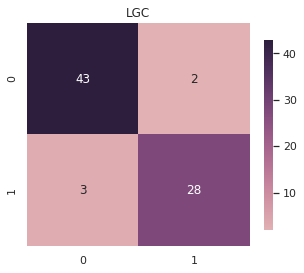

In [139]:
pred = lgc_grid.predict(x_test)
cm = confusion_matrix(y_test, pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,5))
cmap = sns.cubehelix_palette(light=0.75, as_cmap=True)
sns.heatmap(cm,square=True,cmap=cmap, cbar_kws={"shrink": .7},annot=True)
plt.title('LGC')
plt.show()

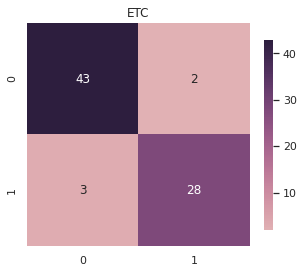

In [141]:
pred = etc_grid.predict(x_test)
cm = confusion_matrix(y_test, pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,5))
cmap = sns.cubehelix_palette(light=0.75, as_cmap=True)
sns.heatmap(cm,square=True,cmap=cmap, cbar_kws={"shrink": .7},annot=True)
plt.title('ETC')
plt.show()

In [135]:
# Calculate False positive and true positive rates for plotting roc curve  
y_pred_proba = lgc_grid.predict_proba(x_test)[::,1]
y_pred_proba2 = etc_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
auc = roc_auc_score(y_test, y_pred_proba)
auc2 = roc_auc_score(y_test, y_pred_proba2)

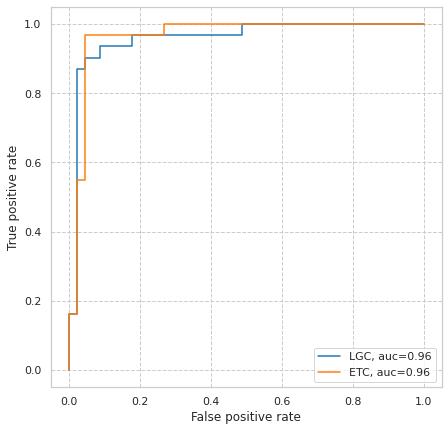

In [136]:
# Plot roc curve
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,label="LGC, auc="+str(round(auc,2)))
plt.plot(fpr2,tpr2,label="ETC, auc="+str(round(auc2,2)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

* Both the Logistic regression classifier and extra trees ensemble classifer has 96% probability in classifying correctly

In [130]:
import joblib
joblib.dump(lgc_grid,'heart_disease_classifier_logistic.pkl')
joblib.dump(etc_grid,'heart_disease_classifier_extra_tree.pkl')

['heart_disease_classifier_extra_tree.pkl']

### **Conclusion**